<a href="https://colab.research.google.com/github/ShoukkiyaAshraf/Machine-Learning/blob/master/SVM_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y = iris.target

print('class labels : [0 1 2]')
print(type(x))

class labels : [0 1 2]
<class 'numpy.ndarray'>


In [21]:
from sklearn.model_selection import train_test_split

#splitting up of the data
print(type(y))
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=1,stratify=y)
print('Labels counts in y : ',np.bincount(y))
print(y_test)
print('Labels counts in y_train  :',np.bincount(y_train))
print('Labels counts in y_test : ',np.bincount(y_test))
print(type(y))

<class 'numpy.ndarray'>
Labels counts in y :  [50 50 50]
[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
Labels counts in y_train  : [40 40 40]
Labels counts in y_test :  [10 10 10]
<class 'numpy.ndarray'>


In [3]:
from sklearn.preprocessing import StandardScaler #preprocessing by removing the mean and scaling to unit varience
#normalising to -1 and 1
sc=StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
#print(x_train)
#print(x_train_std)
#print(x_test_std)

from sklearn.svm import SVC

svm = SVC(kernel='linear',C=1.0, random_state=1)
svm.fit(x_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
x_combined_std = np.vstack((x_train_std,x_test_std))
y_combined = np.hstack((y_train,y_test))

print(y_train)
print("******************************")
print(y_test)


[0 0 2 1 1 1 1 2 2 1 2 0 1 1 2 0 2 1 1 0 0 2 2 1 2 2 0 0 2 0 0 0 0 2 0 1 2
 1 2 2 1 1 2 2 1 1 2 1 1 0 2 0 2 0 0 1 0 1 2 0 2 0 0 2 2 0 1 0 0 1 2 1 1 0
 0 1 2 1 1 2 1 2 0 1 2 1 1 0 0 2 1 2 1 0 1 2 2 0 0 2 2 0 2 1 1 1 2 0 2 1 2
 0 2 0 1 0 1 0 0 0]
******************************
[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')


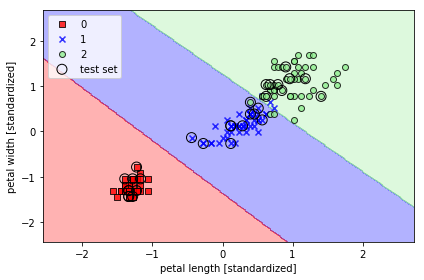

In [15]:
plot_decision_regions(x_combined_std,y_combined,classifier=svm,test_idx=range(120,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()